# Salary Prediction Demo 02

We have the clean data; accounting for basic aspects of data quality
- Type consistency


As well are more bespoke aspects
- Reduce class imbalance


In [1]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 16.0 MB/s eta 0:00:00
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from helper import load_data
import seaborn

def describe_feature(x): 
    v = df_meta[df_meta['Var'] == x]['Description'].values
    if len(v) == 0:
        return ''
    else:
        return v[0]

In [3]:
df_meta, all_codes = load_data(r"./", verbose=False)

                           U.S. DEPARTMENT OF COMMERCE
                                 BUREAU OF CENSUS                          *** DATA EXTRACTION SYSTEM ***  DOCUMENTATION OF: FILE CONTENTS  FOR DATA COLLECTION: 'pums901p' - 1990 Decenial Census 1% PUMS - Persons Records    VAR: = Variable Name
    TYP: = Variable Type     ( C = Categorical, N = Numeric Continuous )
    DES: = Designation       ( P = Primary Variable, X = Non-Primary )
    LEN: = Length            ( of the Variable in Characters )
    CAT: = Category          ( of the Variable )
VAR:        TYP:   DES:    LEN:   CAT:    VARIABLE/CATEGORY LABEL:
__________________________________________________________________________________
AAGE         C       X      1             Age Allocation Flag
                                  0       No
                                  1       YesVAR:        TYP:   DES:    LEN:   CAT:    VARIABLE/CATEGORY LABEL:
___________________________________________________________________________

In [4]:
df = pd.read_csv('us_census_data_cleaned.csv').drop('Unnamed: 0', axis=1)

In [5]:
df.head(5)

,AGE,ANCSTRY1,ANCSTRY2,CITIZEN,CLASS,DEPART,DISABL1,ENGLISH,FEB55,FERTIL,...,WORKLWK,WWII,YEARSCH,YRSSERV,YEARSCH_CAT,OCCUP_JOB,OCCUP_SUM,OCCUP_MAJ,INDUSTRY_CAT,INDUSTRY_SUM
0,30,999,999,True,"Local Gov. Emp. City, County, Etc.",480,2,1,0,3,...,True,0,11,0,"Some Coll., But No Degree","Cooks (5214, 5215)",SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...",Elementary and secondary schools (821),PROFESSIONAL AND RELATED SERVICES
1,44,999,999,True,Emp. of a Private for Profit Company or,330,2,1,0,0,...,True,0,11,0,"Some Coll., But No Degree",Electricians (part 6432),"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPA...",Construction Trades,"CONSTRUCTION (15, 16, 17)","CONSTRUCTION (15, 16, 17)"
2,47,50,999,True,"Local Gov. Emp. City, County, Etc.",870,2,1,1,0,...,True,0,11,2,"Some Coll., But No Degree","Police and detectives, public service (5132)",SERVICE OCCUPATIONS,Protective Service Occupations,"Justice, public order, and safety (92)",PUBLIC ADMINISTRATION
3,42,615,999,False,"Self Emp. in Own Not Incorp.d Business,",420,2,1,0,0,...,True,0,16,0,Professional Degree,Physicians (261),MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,Professional Specialty Occupations,"Offices and clinics of physicians (801, 803)",PROFESSIONAL AND RELATED SERVICES
4,52,210,999,True,Fed. Gov. Emp.,300,2,1,1,0,...,True,0,13,9,"Associate Degree in Coll., Academic Prog","Production inspectors, checkers, and examiners...","OPERATORS, FABRICATORS, AND LABORERS","Machine Operators, Assemblers, and Inspectors",Electric light and power (491),"TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBL..."


One aspect we need to pay attention to is what tpye of data is in each feature, categorical vs continuous

In [6]:
num_cols = [
    'AGE',
    'YEARWRK',
    'FERTIL',
    'HOUR89',
    'HOURS',
    'RIDERS',
    'WEEK89', 
    'TRAVTIME',
    'YRSSERV',
    'REARNING',
    'INCOME1',
    'PWGT1',
    'DEPART',
    'RIDERS',
]

cats = [
    'OCCUP',
    'OCCUP_JOB',
    'OCCUP_SUM',
    'OCCUP_MAJ',
    'INDUSTRY',
    'RACE',
    'SEX',
    'ENGLISH',
    'FERTIL',
    'WWII',
    'SCHOOL',
    'MARITAL',
    'MEANS',
    'MILITARY',
    'CITIZEN',
    'YEARSCH',
    'CLASS',
#     'SEPT80',
    'POWSTATE',
    'VIETNAM',
    'KOREAN'
]

In [7]:
for x in list(df.columns):
    try:
        print(f"{x:<20} - {describe_feature(x)}")
    except:
        print(x)

AGE                  - Age
ANCSTRY1             - Ancestry First Entry See Appendix I Ance
ANCSTRY2             - Ancestry Second Entry See Appendix I Anc
CITIZEN              - Citizenship
CLASS                - Class of Worker
DEPART               - Time of Departure for Work Hour and Minu
DISABL1              - Work Limitation Stat.
ENGLISH              - Ability to Speak English
FEB55                - Served February 1955 July 1964
FERTIL               - No. of Chld. Ever Born
HISPANIC             - Detailed Hispanic Origin Code See Append
HOUR89               - Usual Hrs. Worked Per Week Last Yr. 1989
HOURS                - Hrs. Worked Last Week
IMMIGR               - Yr. of Entry
INDUSTRY             - Ind. See Appendix I Ind..lst
KOREAN               - Served Korean Conflict June 1950 January
MARITAL              - Marital Stat.
MAY75880             - Served May 1975 to August 1980
MEANS                - Means of Transportation to Work
MIGPUMA              - Migration Puma State

## 1.1 EDA : Inspect Target Variable

Summary statistics are useful to understand some basic information

In [8]:
# mean salary
print(fr"Average Salary USA 1990: ${df['REARNING'].mean():.0f}")

Average Salary USA 1990: $19904


In [9]:
# variance in salary is very large
print(fr"Average Salary USA 1990: ${df['REARNING'].mean():.0f} +/- ${df['REARNING'].std():.0f}")

Average Salary USA 1990: $19904 +/- $22305


A better way to visualize this is with a histogram

Text(0, 0.5, 'Frequency (noramlized)')

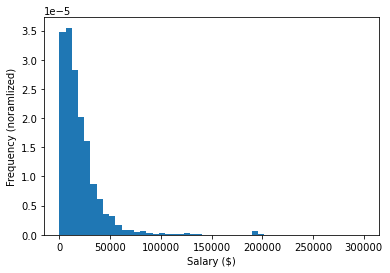

In [10]:
# histogram of mean wage per occupation
_ = plt.hist(df['REARNING'], density=1, bins = np.linspace(0,300000,50))
plt.xlabel(r"Salary ($)")
plt.ylabel(r"Frequency (noramlized)")

## 1.2 EDA :  Explore how input features influence target variable

- EDA will uncover ways to further clean data (one of the common feedback loops in ML)
- It is these relationships that ML will exploit to find the best predictions of salary

Text(0, 0.5, 'Frequency (noramlized)')

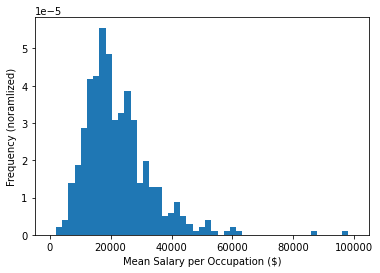

In [11]:
# histogram of mean wage per occupation
_ = plt.hist(df[['OCCUP', 'REARNING']].groupby('OCCUP').mean(),
            np.linspace(0,100000,50), density=1)
plt.xlabel(r"Mean Salary per Occupation ($)")
plt.ylabel(r"Frequency (noramlized)")

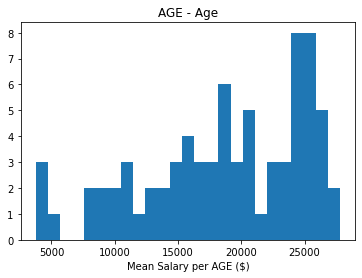

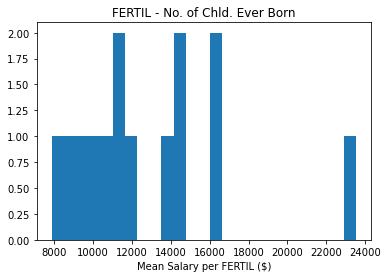

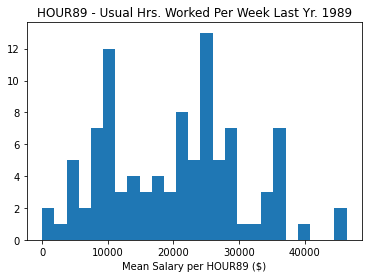

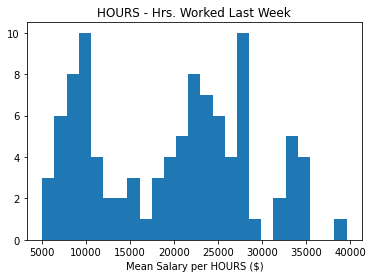

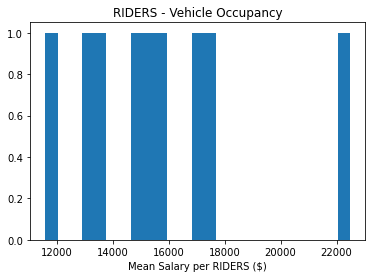

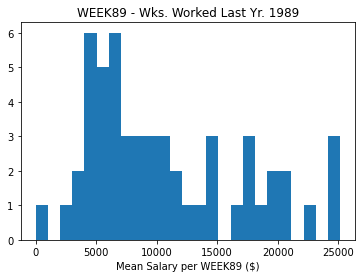

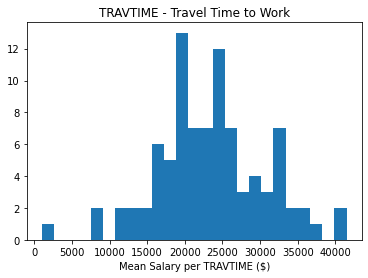

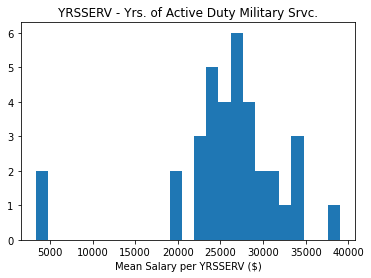

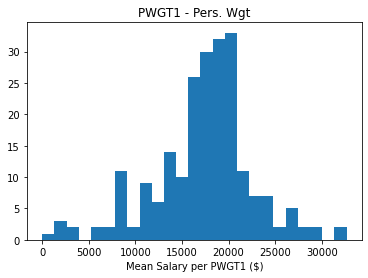

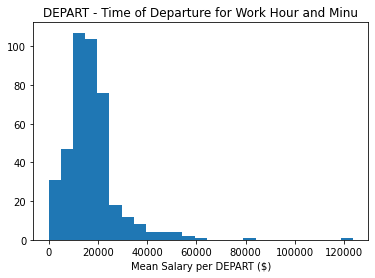

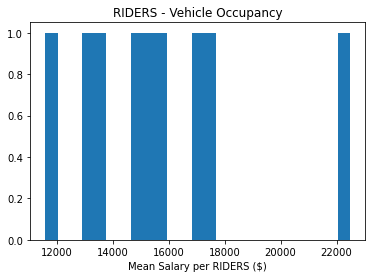

In [12]:
# histogram of mean wage per occupation
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.hist(df[[var, 'REARNING']].groupby(var).mean(), bins=25)
    plt.title(f"{var} - {describe_feature(var)}")
    plt.xlabel(fr"Mean Salary per {var} ($)")
    plt.show()

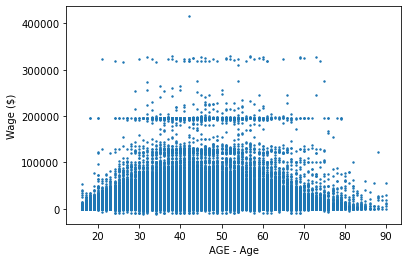

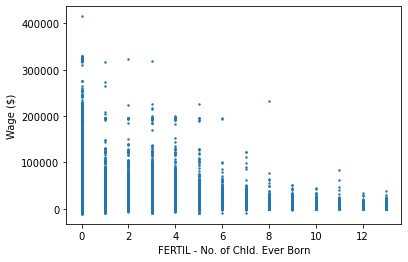

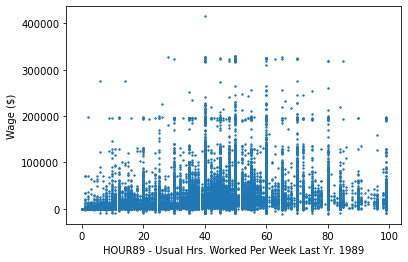

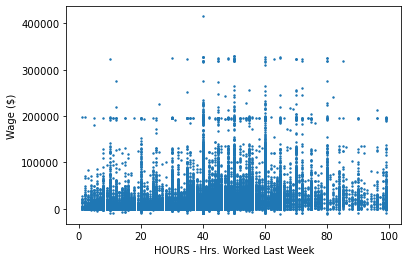

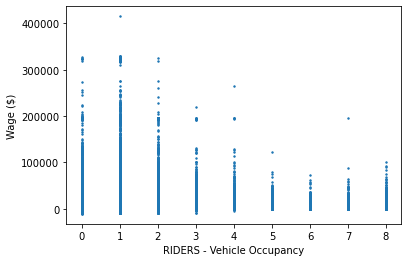

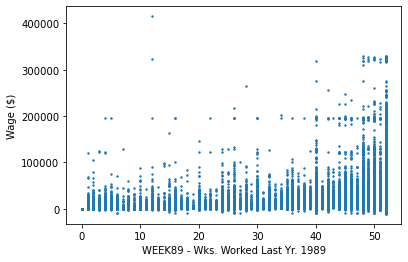

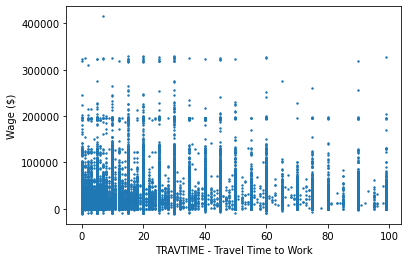

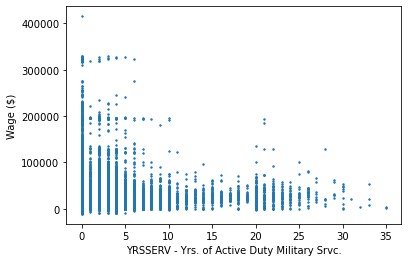

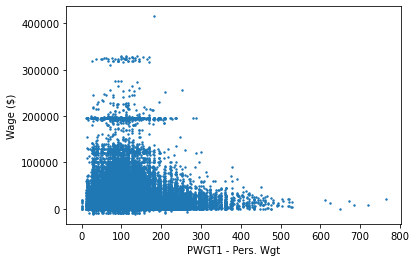

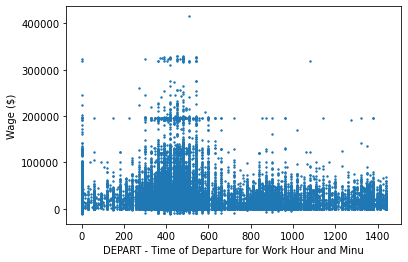

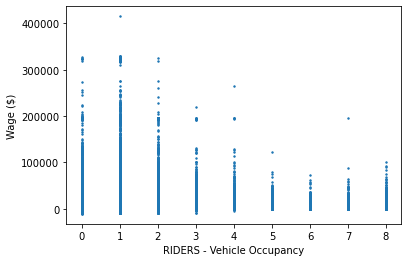

In [13]:
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.scatter(df[var].values, df['REARNING'], s=2)
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.ylabel(r"Wage ($)")
    plt.show()

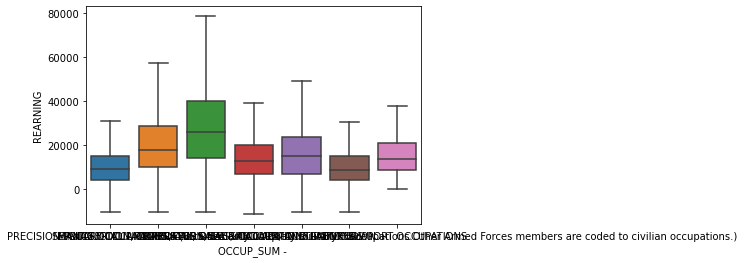

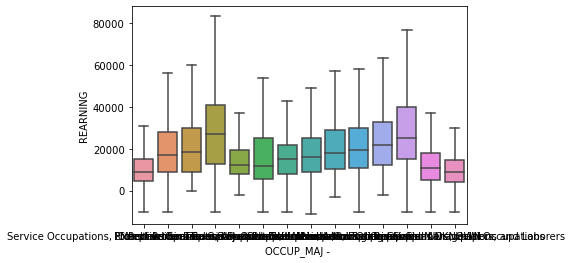

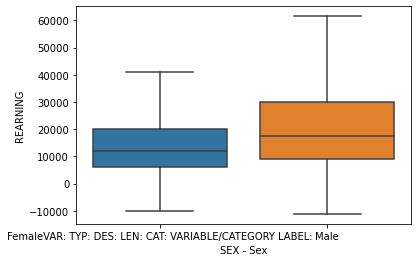

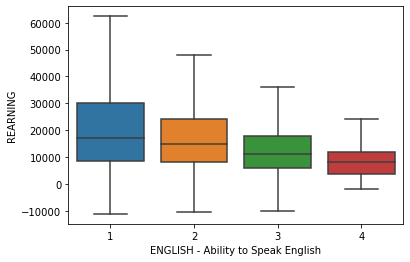

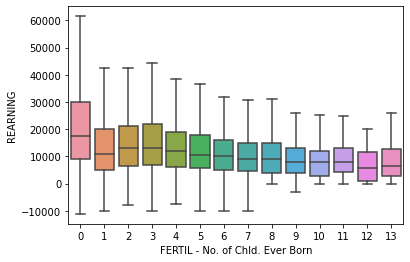

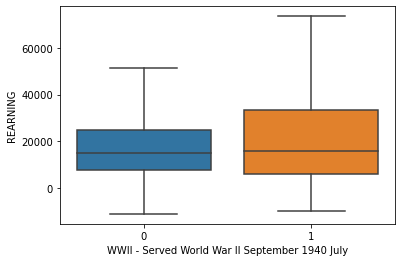

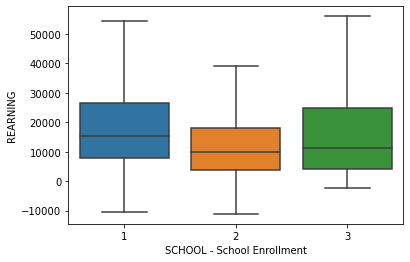

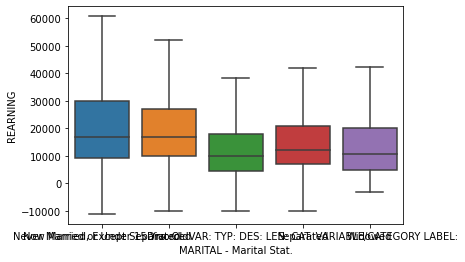

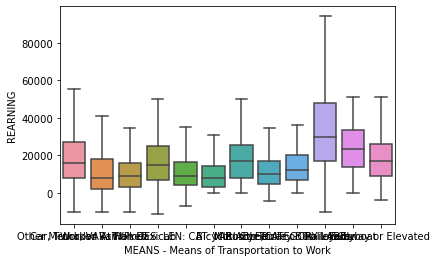

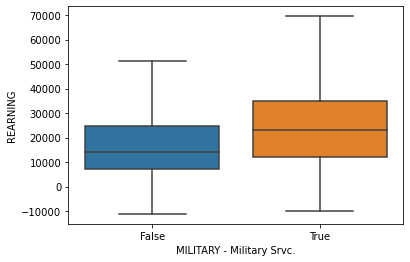

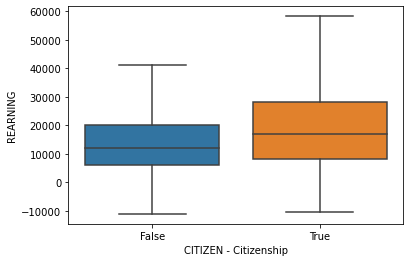

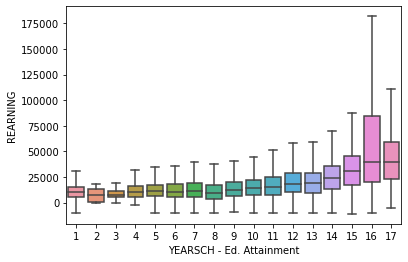

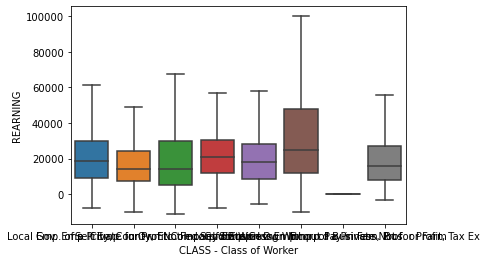

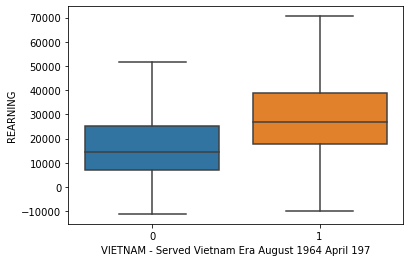

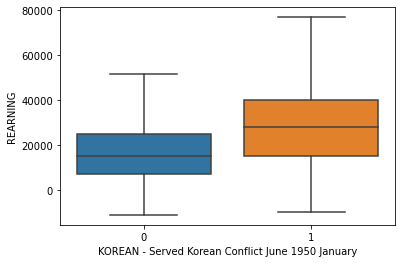

In [14]:
for var in cats:
    cardinality = len(df[var].unique())
    if cardinality > 50:
        continue
    seaborn.boxplot(x =var,
                    y ='REARNING',
                    data = df[[var, 'REARNING']],
                    orient="v",
                    showfliers = False)
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.show()

## 1.3 Data Insights 

This is not strictly necessary for ML; however deriving interesting or useful insights from data serves a number of purposes

- Can be presented at a high level to show results from all the effort in data cleaning
- To sanity check the data

### 1.3.1 Highest Paid Jobs

In [15]:
# list all the jobs
#df['OCCUP_JOB'].unique()

In [16]:
# how mnay judges are there?
df_tmp = df[['OCCUP_JOB','PWGT1', 'REARNING']]
n_judges = df_tmp[df_tmp['OCCUP_JOB'] == "Judges (212)"]['PWGT1'].sum()
print(fr"Number of Judges  : {n_judges:.0f}")

# how mnay lawyers are there?
df_tmp    = df[['OCCUP_JOB','PWGT1','REARNING']]
n_lawyers = df_tmp[df_tmp['OCCUP_JOB'] == "Lawyers (211)"]['PWGT1'].sum()
print(fr"Number of Lawyers : {n_lawyers:.0f}")

Number of Judges  : 2073
Number of Lawyers : 46084


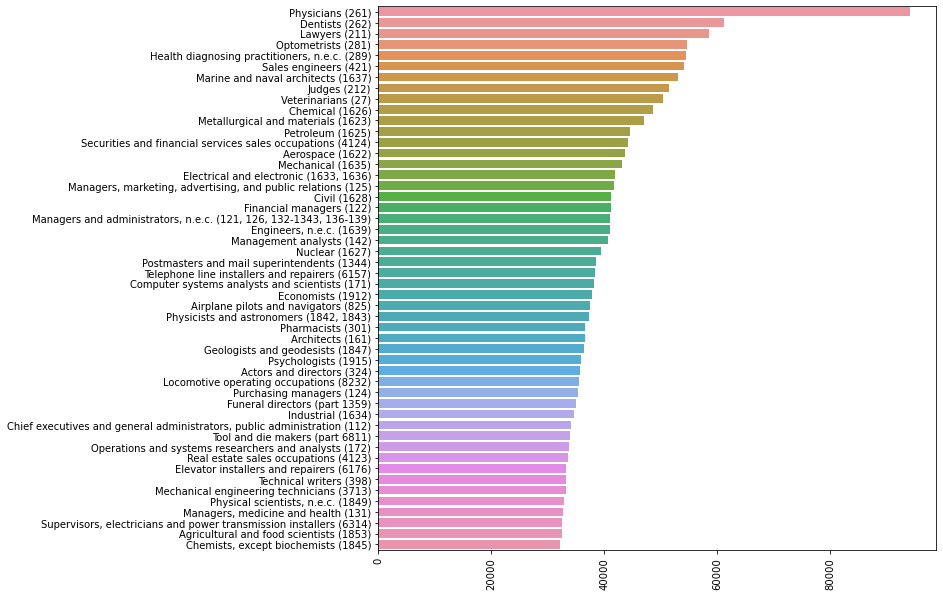

In [17]:
pd.options.mode.chained_assignment = None
gb = df[['OCCUP_JOB','PWGT1', 'REARNING']]

gb['count']     = gb['PWGT1'].astype(int)
gb['OCCUP_JOB'] = gb['OCCUP_JOB'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('OCCUP_JOB').sum()

min_thresh = gb.sum()['count'] > 1000
gb = gb[gb['count'] > 1000]

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']

df_plot = gb.reset_index().reindex().sort_values('REARNING', ascending=False)

df_plot = df_plot.reset_index().drop('index', axis=1)#.iloc[-100:,:]

fig, ax = plt.subplots(1,1,figsize=(10,10))

seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:50].astype('str'), 
                x=df_plot['REARNING'].values[:50],
                orient="h")
_ = plt.xticks(rotation=90) 

In [18]:
gb          = df[['OCCUP_JOB', 'REARNING']].copy()
gb['count'] = 1
gb          = gb.groupby('OCCUP_JOB')

df_plot = gb.mean()[gb.sum()['count']>500].reset_index().reindex().sort_values('REARNING', ascending=False)
df_plot = df_plot.reset_index().drop('index', axis=1)

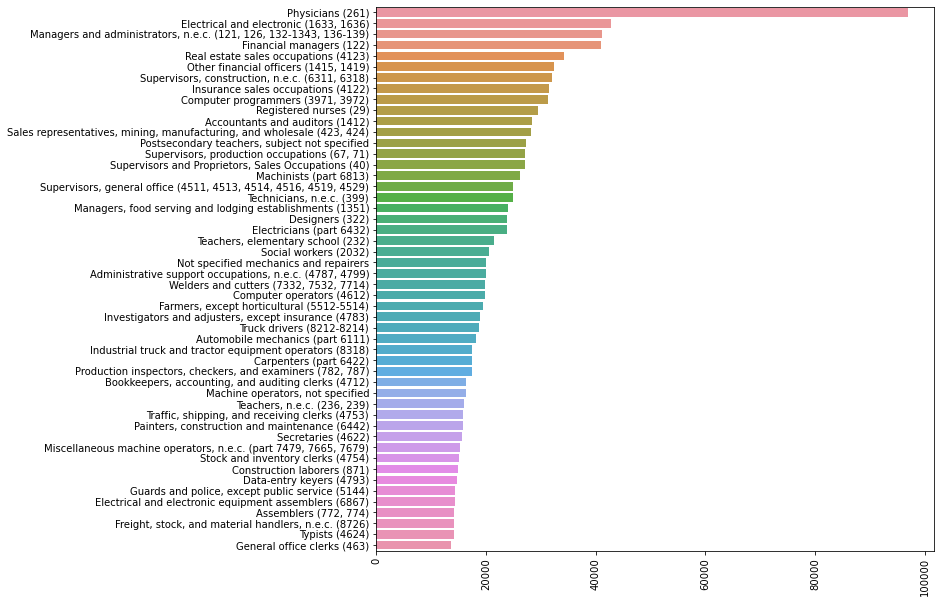

In [19]:
top_k = 50
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:top_k].astype('str'), 
                x=df_plot['REARNING'].values[:top_k],
                orient="h")
_ = plt.xticks(rotation=90) 

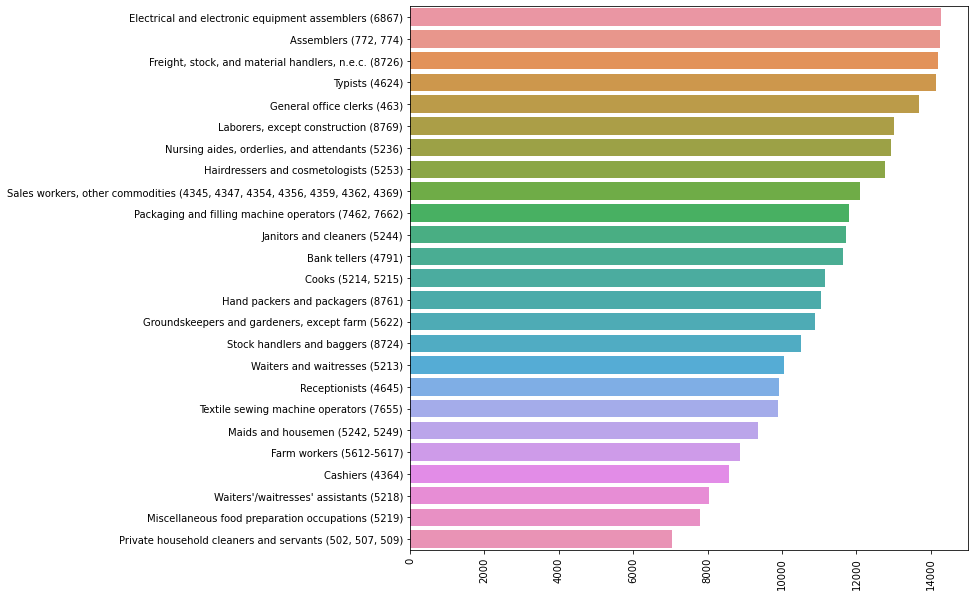

In [20]:
bottom_k = 25
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[-bottom_k:].astype('str'), 
                x=df_plot['REARNING'].values[-bottom_k:],
                orient="h")
_ = plt.xticks(rotation=90) 

### 1.3.2 Average Pay vs Education

In [21]:
all_codes['YEARSCH']

{'00': 'N/a Less Than 3 Yrs. Old',
 '01': 'No School Completed',
 '02': 'Nursery School',
 '03': 'Kindergarten',
 '04': '1st, 2nd, 3rd, or 4th Grade',
 '05': '5th, 6th, 7th, or 8th Grade',
 '06': '9th Grade',
 '07': '10th Grade',
 '08': '11th Grade',
 '09': '12th Grade, No Diploma',
 '10': 'High School Graduate, Diploma or Ged',
 '11': 'Some Coll., But No Degree',
 '12': 'Associate Degree in Coll., Occupational',
 '13': 'Associate Degree in Coll., Academic Prog',
 '14': 'Bachelors Degree',
 '15': 'Masters Degree',
 '16': 'Professional Degree',
 '17': 'Doctorate DegreeVAR: TYP: DES: LEN: CAT: VARIABLE/CATEGORY LABEL:'}

In [22]:
print(fr"No doctorate                     : ${df[df['YEARSCH'] != 17]['REARNING'].mean():.2f}")
print(fr"A Degree                         : ${df[df['YEARSCH'] >= 12]['REARNING'].mean():.2f}")
print(fr"Professional Degree or Doctorate : ${df[df['YEARSCH'] >= 16]['REARNING'].mean():.2f}")

No doctorate                     : $19572.13
A Degree                         : $31264.72
Professional Degree or Doctorate : $55752.26


### 1.3.3 Best place to live for salary

In [23]:
all_codes['POWSTATE']

{'00': 'N/a Not a Worker Not in the Labor Force,',
 '01': 'Alabama',
 '02': 'Alaska',
 '04': 'Arizona',
 '05': 'Arkansas',
 '06': 'California',
 '08': 'Colorado',
 '09': 'Connecticut',
 '10': 'Delaware',
 '11': 'District of Columbia',
 '12': 'Florida',
 '13': 'Georgia',
 '15': 'Hawaii',
 '16': 'Idaho',
 '17': 'Illinois',
 '18': 'Indiana',
 '19': 'Iowa',
 '20': 'Kansas',
 '21': 'Kentucky',
 '22': 'Louisiana',
 '23': 'Maine',
 '24': 'Maryland',
 '25': 'Massachusetts',
 '26': 'Michigan',
 '27': 'Minnesota',
 '28': 'Mississippi',
 '29': 'Missouri',
 '30': 'Montana',
 '31': 'Nebraska',
 '32': 'Nevada',
 '33': 'New Hampshire',
 '34': 'New Jersey',
 '35': 'New Mexico',
 '36': 'New York',
 '37': 'North Carolina',
 '38': 'North Dakota',
 '39': 'Ohio',
 '40': 'Oklahoma',
 '41': 'Oregon',
 '42': 'Pennsylvania',
 '44': 'Rhode Island',
 '45': 'South Carolina',
 '46': 'South Dakota',
 '47': 'Tennessee',
 '48': 'Texas',
 '49': 'Utah',
 '50': 'Vermont',
 '51': 'Virginia',
 '53': 'Washington',
 '54': '

In [24]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE']      > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
# gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False).drop(['AGE', 'PWGT1'], axis=1)

gb.head(5)

,POWSTATE,REARNING,count
0,Abroad,31118.857370,13847
9,District of Columbia,31036.278529,100898
23,Michigan,30335.448672,179345
49,West Virginia,28627.425273,8705
43,Tennessee,27836.421808,48707


(15000.0, 40000.0)

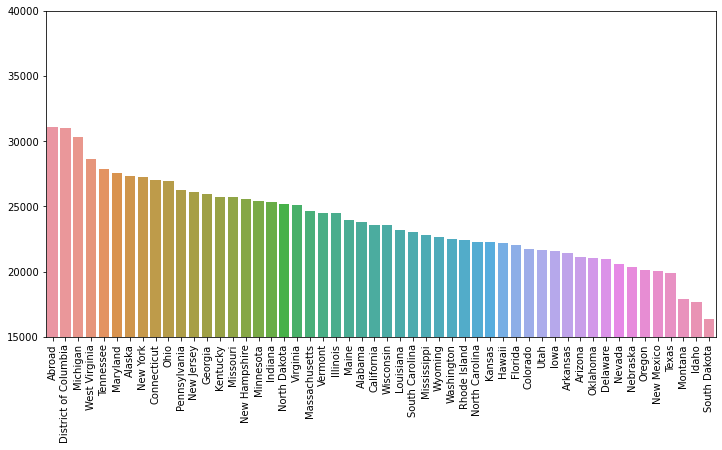

In [25]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 
plt.ylim([15000,40000])

In [26]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[(gb['AGE']     > 50) & (gb['AGE'] <= 80)]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
# gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False).drop(['AGE', 'PWGT1'], axis=1)

gb.head(5)

,POWSTATE,REARNING,count
18,Kentucky,47840.164828,2900
49,West Virginia,43600.475941,2099
9,District of Columbia,42149.372612,13765
0,Abroad,41683.939171,2170
2,Alaska,39965.635981,3563


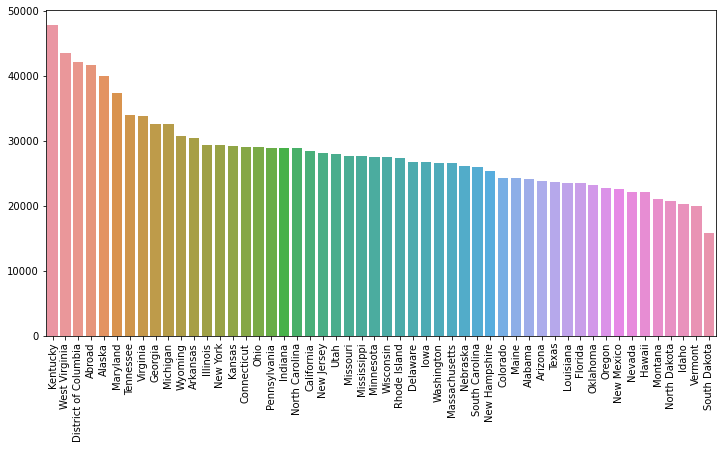

In [27]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values.astype('str'), 
                y=gb['REARNING'].values,
                orient="v")
_ = plt.xticks(rotation=90) 

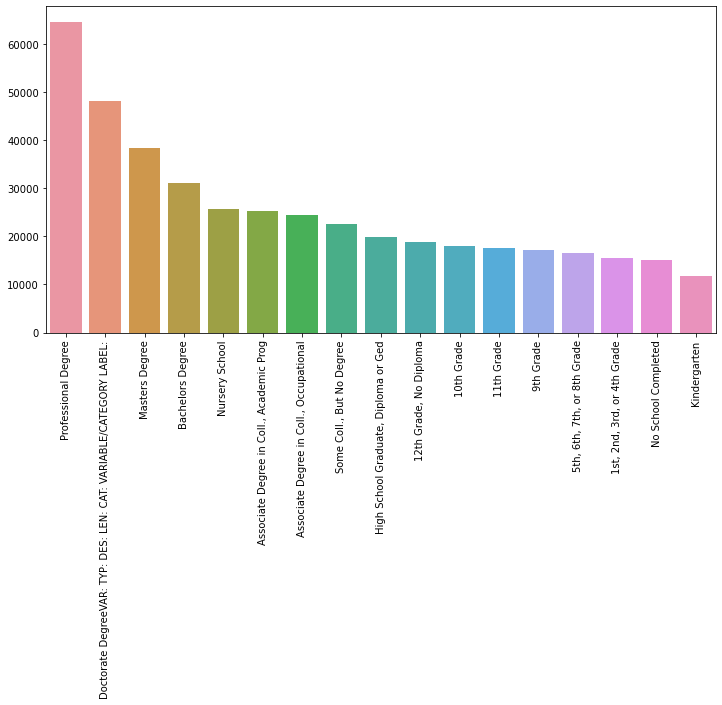

In [28]:
gb = df[['YEARSCH', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE']      > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['YEARSCH']   = gb['YEARSCH'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('YEARSCH').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['YEARSCH']  = gb['YEARSCH'].apply(lambda x: all_codes['YEARSCH'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)


fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['YEARSCH'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 

In [34]:
import pandas as pd
import folium
from   folium.plugins import MarkerCluster
import geocoder
import json

In [35]:
states_geo = 'USA_States_(Generalized).geojson'
# [f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

In [36]:
df.head(1)

,AGE,ANCSTRY1,ANCSTRY2,CITIZEN,CLASS,DEPART,DISABL1,ENGLISH,FEB55,FERTIL,...,WORKLWK,WWII,YEARSCH,YRSSERV,YEARSCH_CAT,OCCUP_JOB,OCCUP_SUM,OCCUP_MAJ,INDUSTRY_CAT,INDUSTRY_SUM
0,30,999,999,True,"Local Gov. Emp. City, County, Etc.",480,2,1,0,3,...,True,0,11,0,"Some Coll., But No Degree","Cooks (5214, 5215)",SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...",Elementary and secondary schools (821),PROFESSIONAL AND RELATED SERVICES


In [37]:
df_wage = df.copy()
df_wage = df_wage[df_wage['REARNING'] > 5000]
df_wage = df_wage[(df_wage['AGE'] > 0) & (df_wage['AGE'] < 100)]

df_wage['REARNING'] = df_wage['REARNING'] * df_wage['PWGT1']
gb_wage = df_wage[['POWSTATE', 'REARNING', 'PWGT1']].groupby('POWSTATE')

df_wage = gb_wage.sum().reset_index()
df_wage['REARNING'] = df_wage['REARNING'] / df_wage['PWGT1']

# df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

In [38]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=df_wage,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary ($)')

# display map
world_choropelth

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### 1.3.4 Occupations

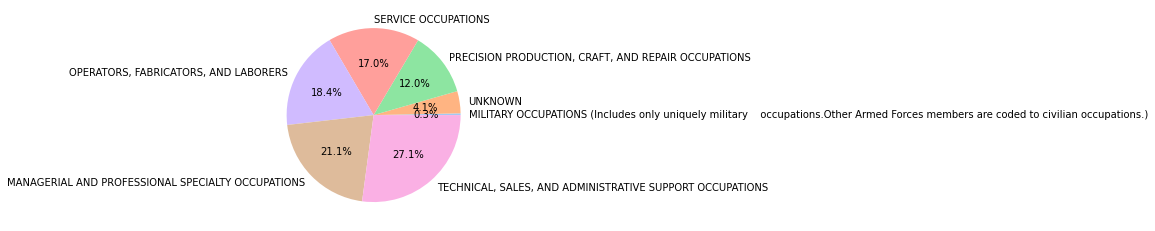

In [39]:
df_plot = df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

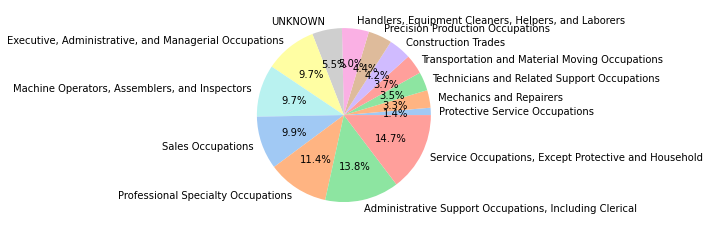

In [40]:
df_plot = df[['OCCUP','OCCUP_MAJ']].groupby('OCCUP_MAJ').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_MAJ']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

In [41]:
df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count()

,OCCUP
OCCUP_SUM,
MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,29068
MILITARY OCCUPATIONS (Includes only uniquely military occupations.Other Armed Forces members are coded to civilian occupations.),444
"OPERATORS, FABRICATORS, AND LABORERS",25329
"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPATIONS",16589
SERVICE OCCUPATIONS,23446
"TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OCCUPATIONS",37412
UNKNOWN,5682


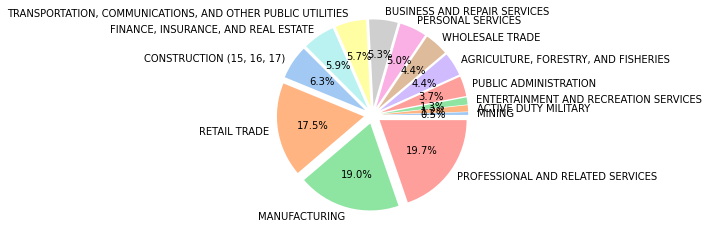

In [42]:
df_plot = df[['INDUSTRY','INDUSTRY_SUM']].groupby('INDUSTRY_SUM').count().reset_index()

#define data
data   = df_plot['INDUSTRY']
labels = df_plot['INDUSTRY_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%',explode=[0.1] * len(data))
plt.show()

### 1.3.5 Validation using external sources

Check the USA GDP using our data

In [43]:
gdp_bn_1990 = 5963 
# Share of Labour Compensation in GDP at Current National Prices for United States = 0.61 for 1990
0.61 * gdp_bn_1990

3637.43

In [44]:
# billions in wages
100 * df['REARNING'].sum() / 1e9

274.6216174

In [46]:
tst = pd.read_csv(os.path.join(r"./",'USCensus1990raw.data.txt'), 
                 delimiter="\t", 
                 header=0, 
#                  nrows=100000, 
                 dtype=str)
tst.columns = list(df_meta['Var'].values)

In [47]:
# The USCensus1990raw data set contains a one percent sample of the Public Use Microdata Samples (PUMS) person records drawn from the full 1990 census sample.
(250000000 / tst.shape[0])*tst['RPINCOME'].astype(float).sum() / 1e9

3440.7207820577282

In [48]:
# military size : should be 2M
(1640/137970)*250000000

2971660.505907081

### 1.3.6 Where is there the largest wage discrepancy based on race?

In [53]:
import pandas as pd
import folium          #  folium libraries
from   folium.plugins import MarkerCluster

try:
    import geocoder    #  geocoder
except:
    ! pip install geocoder
    import geocoder    #  geocoder
import json

states_geo = 'USA_States_(Generalized).geojson'
# [f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

In [54]:
race_map ={
    'White 800 869, 971' : 'white',
}
df['RACE_BW'] = df['RACE'].apply(lambda x: race_map.get(x, 'nonwhite'))

In [55]:
df_wage = df.copy()
df_wage = df_wage[(df_wage['REARNING'] > 5000) & (df_wage['REARNING'] < 100000)]
# df_wage = df_wage[(df_wage['AGE'] > 20) & (df_wage['AGE'] < 80)]
df_wage = df_wage[['POWSTATE','RACE_BW', 'REARNING']].groupby(['POWSTATE','RACE_BW']).mean().reset_index()
df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

data = {}
for state in df_wage['POWSTATE'].unique():
    df_tmp = df_wage[df_wage['POWSTATE'] == state]

    w1 = df_tmp[df_tmp['RACE_BW'] == 'white']['REARNING'].values[0]
    w2 = df_tmp[df_tmp['RACE_BW'] == 'nonwhite']['REARNING'].values[0]
    data[state] = w1/w2

KeyError: 'Abroad'

In [56]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=data,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='Reds',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary Ratio White/Non-White')

# display map
world_choropelth 

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [57]:
df['RACE']

0                  White 800 869, 971
1                  White 800 869, 971
2                  White 800 869, 971
3               Asian Indian 600, 982
4         Other Race 700 799, 986 999
                     ...             
137965             White 800 869, 971
137966             White 800 869, 971
137967             White 800 869, 971
137968             White 800 869, 971
137969             White 800 869, 971
Name: RACE, Length: 137970, dtype: object

### 1.3.7 Migration

We compare place-of-birth to place-of-work to learn about migration

In [58]:
df_2 = df.copy()
# df_2['POWSTATE'] = df_2['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
# df_2['POB']      = df_2['POB'].apply(lambda x: all_codes['POB'][str(x).zfill(3)])

df_2 = df_2[df_2['REARNING'] >= 5000]
df_2 = df_2[df_2['AGE']      >= 18]
df_2 = df_2[['POWSTATE','POB','REARNING', 'PWGT1','YEARSCH_CAT','CITIZEN', 'AGE', 'OCCUP_SUM']]

df_3 = df_2.groupby(['POWSTATE','POB']).count().reset_index()

df_wage = df_2.copy()
df_wage = df_wage[['POWSTATE','POB','REARNING']].groupby(['POWSTATE','POB']).mean().reset_index()
df_wage = df_wage.sort_values('REARNING', ascending=False)

In [59]:
df_wage['Count'] = df_wage.apply(lambda x: df_3[(df_3['POWSTATE'] == x['POWSTATE']) & 
                                                (df_3['POB']      == x['POB'])       ]['PWGT1'].values[0], axis=1)

In [60]:
df_wage

,POWSTATE,POB,REARNING,Count
2452,Missouri,Colorado,316686.0,1
193,Arizona,Belgium,220009.0,2
2197,Michigan,Brazil,219573.0,1
368,California,Chad,195516.0,1
1847,Louisiana,Syria,194587.0,1
...,...,...,...,...
2980,New Mexico,North Dakota,5000.0,1
201,Arizona,Colombia,5000.0,1
3617,Oregon,Syria,5000.0,1
2739,New Hampshire,Latvia,5000.0,1


In [61]:
# some anomalies due to single people
df_wage

,POWSTATE,POB,REARNING,Count
2452,Missouri,Colorado,316686.0,1
193,Arizona,Belgium,220009.0,2
2197,Michigan,Brazil,219573.0,1
368,California,Chad,195516.0,1
1847,Louisiana,Syria,194587.0,1
...,...,...,...,...
2980,New Mexico,North Dakota,5000.0,1
201,Arizona,Colombia,5000.0,1
3617,Oregon,Syria,5000.0,1
2739,New Hampshire,Latvia,5000.0,1


In [62]:
# high earners, excluding small sample sizes
df_wage[df_wage['Count'] > 50].sort_values('REARNING', ascending=False).head(50)

,POWSTATE,POB,REARNING,Count
3090,New York,Japan,70152.551402,107
2229,Michigan,India,53605.833333,60
416,California,Iraq,53118.950000,60
3370,Ohio,India,52075.980392,51
3679,Pennsylvania,India,51081.790323,62
3189,New York,West Germany,44177.916667,60
992,Florida,India,44173.653846,52
3054,New York,Egypt,42444.830508,59
480,California,Pennsylvania,42312.528736,87
471,California,Ohio,41082.164835,91


In [63]:
# what education do they have?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('YEARSCH_CAT').count()['CITIZEN']

YEARSCH_CAT
10th Grade                                                            1
Associate Degree in Coll., Academic Prog                              5
Associate Degree in Coll., Occupational                               1
Bachelors Degree                                                     58
Doctorate DegreeVAR: TYP: DES: LEN: CAT: VARIABLE/CATEGORY LABEL:     5
High School Graduate, Diploma or Ged                                 14
Masters Degree                                                       14
No School Completed                                                   2
Professional Degree                                                   1
Some Coll., But No Degree                                             6
Name: CITIZEN, dtype: int64

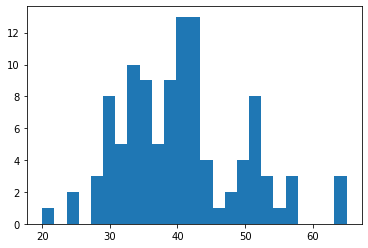

In [64]:
# How old are they?
_ = plt.hist(df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')]['AGE'], bins=25)

In [65]:
# what are they doing?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('OCCUP_SUM').count()

,POWSTATE,POB,REARNING,PWGT1,YEARSCH_CAT,CITIZEN,AGE
OCCUP_SUM,,,,,,,
MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,60,60,60,60,60,60,60
"OPERATORS, FABRICATORS, AND LABORERS",4,4,4,4,4,4,4
"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPATIONS",3,3,3,3,3,3,3
SERVICE OCCUPATIONS,9,9,9,9,9,9,9
"TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OCCUPATIONS",31,31,31,31,31,31,31


In [66]:
# TODO : Sankey the fuck out of this

df_migration = df.copy()

df_migration = df_migration[['PWGT1','POWSTATE',"MIGSTATE"]].groupby(['POWSTATE',"MIGSTATE"]).sum().reset_index()

df_migration = df_migration[(df_migration['POWSTATE'] != 0) & (df_migration['MIGSTATE'] != 0)]
# df_migration = df_migration[(df_migration['POWSTATE'] != 99) & (df_migration['MIGSTATE'] != 99)]


df_migration['POWSTATE'] = df_migration['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_migration['MIGSTATE'] = df_migration['MIGSTATE'].apply(lambda x: all_codes['MIGSTATE'][str(x).zfill(2)])

df_migration.sort_values('PWGT1', ascending=False).head(50)

KeyError: 'Abroad'